In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("awards.csv")
attributes_names = np.asarray(df.columns)
raw_data = df.get_values()

C:\Users\emmal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\emmal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
df_events = df[['eventId','eventName']].groupby('eventName').count()
df_events = df_events.sort_values('eventId', ascending=False)
famous_events = df_events.head(20)

list_famous_events = []
for row in famous_events.iterrows():
    list_famous_events.append(row[0])

print(list_famous_events)

['Primetime Emmy Awards', 'Daytime Emmy Awards', 'BAFTA Awards', 'News & Documentary Emmy Awards', 'Academy Awards, USA', 'Online Film & Television Association', 'Motion Picture Sound Editors, USA', 'Grammy Awards', 'Adult Video News Awards', 'Young Artist Awards', 'Gemini Awards', 'Leo Awards', 'Writers Guild of America, USA', 'Screen Actors Guild Awards', 'Cannes Film Festival', 'Gold Derby Awards', 'Berlin International Film Festival', 'Academy of Science Fiction, Fantasy & Horror Films, USA', 'CableACE Awards', 'Satellite Awards']


In [4]:
print(min(df['year']),max(df['year']))
print(attributes_names)

1886 2020
['eventId' 'eventName' 'awardName' 'year' 'occurrence'
 'winAnnouncementTime' 'categoryName' 'nomeneeNote' 'name' 'originalName'
 'songNames' 'episodeNames' 'characterNames' 'isWinner' 'isPrimary'
 'isSecondary' 'isPerson' 'isTitle' 'isCompany' 'const' 'notes']


In [5]:
df_event_cat = df[['eventId','eventName', 'categoryName']].groupby('eventName')
df_event_cat.head(10)


,eventId,eventName,categoryName
0,ev0000263,French Syndicate of Cinema Critics,Best Film
1,ev0000263,French Syndicate of Cinema Critics,Best Film
2,ev0000263,French Syndicate of Cinema Critics,Best Foreign Film
3,ev0000263,French Syndicate of Cinema Critics,Best Foreign Film
4,ev0000263,French Syndicate of Cinema Critics,Best Short
...,...,...,...
2156587,ev0011942,Zimbabwe International Film Festival,NaN
2156588,ev0011942,Zimbabwe International Film Festival,NaN
2156589,ev0011942,Zimbabwe International Film Festival,NaN
2157776,ev0000851,WinFemme Film Festival,Best Film or TV Show Directed by a Woman


In [6]:
df_cat = df['categoryName'].dropna().unique()
##df_cat.hist(bins =df_cat.nunique())

In [7]:
print(len(df_cat))
df_cat[:10]

51907


array(['Best Film', 'Best Foreign Film', 'Best Short',
       'Best Feature Film', 'Best Short Film', 'Onda curta',
       'Prémio RTP2', 'International Competition', "Children's Section",
       'Award of Exellence'], dtype=object)

In [8]:
df.head()

,eventId,eventName,awardName,year,occurrence,winAnnouncementTime,categoryName,nomeneeNote,name,originalName,...,episodeNames,characterNames,isWinner,isPrimary,isSecondary,isPerson,isTitle,isCompany,const,notes
0,ev0000263,French Syndicate of Cinema Critics,Critics Award,1992,1,NaN,Best Film,NaN,La belle noiseuse,NaN,...,NaN,NaN,True,True,False,False,True,False,tt0101428,NaN
1,ev0000263,French Syndicate of Cinema Critics,Critics Award,1992,1,NaN,Best Film,NaN,Jacques Rivette,NaN,...,NaN,NaN,True,False,True,True,False,False,nm0729626,NaN
2,ev0000263,French Syndicate of Cinema Critics,Critics Award,1992,1,NaN,Best Foreign Film,NaN,The Double Life of Véronique,La double vie de Véronique,...,NaN,NaN,True,True,False,False,True,False,tt0101765,Poland.
3,ev0000263,French Syndicate of Cinema Critics,Critics Award,1992,1,NaN,Best Foreign Film,NaN,Krzysztof Kieslowski,NaN,...,NaN,NaN,True,False,True,True,False,False,nm0001425,Poland.
4,ev0000263,French Syndicate of Cinema Critics,Critics Award,1992,1,NaN,Best Short,NaN,Le petit chat est mort,NaN,...,NaN,NaN,True,True,False,False,True,False,tt0195135,NaN


In [9]:
#construction of the cleaning one
df_copy = df.copy()


In [10]:
unused_columns = ['occurrence',
 'winAnnouncementTime', 'nomeneeNote', 'originalName',
 'songNames', 'episodeNames', 'characterNames' ,'isCompany' ,'const', 'notes']
df_copy = df_copy[df_copy['isCompany'] == False]
df_copy = df_copy.drop(columns=unused_columns)

In [11]:
#keep only famous ceremonies 20 firsts (431315 over 2157719)
df_copy.reset_index()
df_copy = df_copy[df_copy['eventName'].isin(list_famous_events)]


In [12]:
#Creation of the dict ceremony-place
dictOfCeremonies = { i : 'None' for i in list_famous_events}
dictOfCeremonies[list_famous_events[0]] = "Microsoft Theatre, Los Angeles"
dictOfCeremonies[list_famous_events[1]] = "Microsoft Theatre, Los Angeles"
dictOfCeremonies[list_famous_events[2]] = "Odeon Cinema, Leicester Square, Londres"
dictOfCeremonies[list_famous_events[3]] = "Microsoft Theatre, Los Angeles"
dictOfCeremonies[list_famous_events[4]] = "Théâtre Dolby, Los Angeles, Californie, États-Unis"
dictOfCeremonies[list_famous_events[5]] = "Boston, Massachusetts"
dictOfCeremonies[list_famous_events[6]] = "Beverly Wilshire Hotel Grand Ballroom, Beverly Hills, California"
dictOfCeremonies[list_famous_events[7]] = "Staples Center, Figueroa St, Los Angeles, CA 90015, États-Unis"
dictOfCeremonies[list_famous_events[8]] = "Las Vegas, Nevada"
dictOfCeremonies[list_famous_events[9]] = "Alex Theater, Glendale, Californie"
dictOfCeremonies[list_famous_events[10]] = "Toronto, Canada"
dictOfCeremonies[list_famous_events[11]] = "British Columbia, Canada"
dictOfCeremonies[list_famous_events[12]] = "Los Angeles"
dictOfCeremonies[list_famous_events[13]] = "Shrine Auditorium,  665 W Jefferson Blvd, Los Angeles, CA 90007, États-Unis"
dictOfCeremonies[list_famous_events[14]] = "Palais des festivales, Cannes, France"
dictOfCeremonies[list_famous_events[15]] = "New York, Etats-Unis"
dictOfCeremonies[list_famous_events[16]] = "Berlin, Germany"
dictOfCeremonies[list_famous_events[17]] = "Los Angeles, California, United States"
dictOfCeremonies[list_famous_events[18]] = "Los Angeles, California, United States"
dictOfCeremonies[list_famous_events[19]] = "Los Angeles, California, United States"
print(dictOfCeremonies)

{'Primetime Emmy Awards': 'Microsoft Theatre, Los Angeles', 'Daytime Emmy Awards': 'Microsoft Theatre, Los Angeles', 'BAFTA Awards': 'Odeon Cinema, Leicester Square, Londres', 'News & Documentary Emmy Awards': 'Microsoft Theatre, Los Angeles', 'Academy Awards, USA': 'Théâtre Dolby, Los Angeles, Californie, États-Unis', 'Online Film & Television Association': 'Boston, Massachusetts', 'Motion Picture Sound Editors, USA': 'Beverly Wilshire Hotel Grand Ballroom, Beverly Hills, California', 'Grammy Awards': 'Staples Center, Figueroa St, Los Angeles, CA 90015, États-Unis', 'Adult Video News Awards': 'Las Vegas, Nevada', 'Young Artist Awards': 'Alex Theater, Glendale, Californie', 'Gemini Awards': 'Toronto, Canada', 'Leo Awards': 'British Columbia, Canada', 'Writers Guild of America, USA': 'Los Angeles', 'Screen Actors Guild Awards': 'Shrine Auditorium,  665 W Jefferson Blvd, Los Angeles, CA 90007, États-Unis', 'Cannes Film Festival': 'Palais des festivales, Cannes, France', 'Gold Derby Award

In [13]:
#show the frequency in each event (all at list 10 600 samples in each event so fine)
#for each event associated a place : place
freq = []
df_copy["eventPlace"] = 'None'
for event in list_famous_events: 
    nb = df_copy['eventName'] == event
    df_copy.loc[nb,'eventPlace'] = dictOfCeremonies[event]
    freq.append(nb.sum())
print(freq)



[83374, 49368, 29817, 26329, 25917, 25245, 18953, 18891, 15886, 14770, 14049, 13938, 13854, 13258, 11941, 11494, 11347, 11252, 11041, 10591]


In [14]:
#if we keep only film (much easier to retrieve the home country) we have 134400 films left

df_copy_filmOnly = df_copy[df_copy['isTitle']==True]

#show freq by eventName
freqTitle = []
for event in list_famous_events: 
    nb = df_copy_filmOnly['eventName'] == event
    freqTitle.append(nb.sum())

([<matplotlib.axis.XTick at 0x2d10831c908>,
 <a list of 20 Text xticklabel objects>)

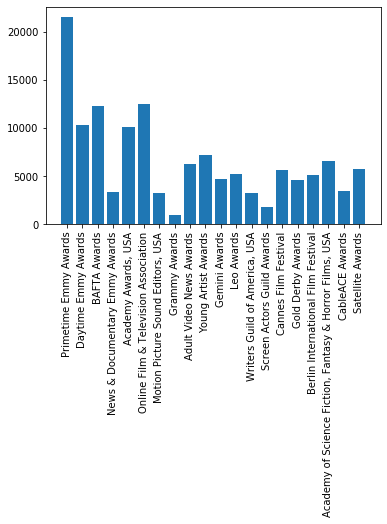

In [15]:
plt.bar(x = range(0,20), height=freqTitle)
plt.xticks(range(0,20), list_famous_events, rotation=90)

([<matplotlib.axis.XTick at 0x2d12f974eb8>,
 <a list of 20 Text xticklabel objects>)

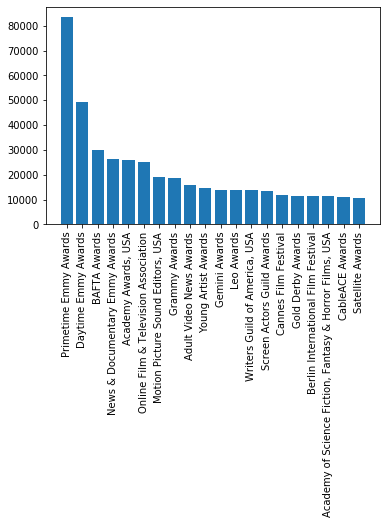

In [16]:
plt.bar(x = range(0,20), height=freq)
plt.xticks(range(0,20), list_famous_events, rotation=90)

In [17]:
df_years_filmOnly = df_copy_filmOnly.groupby(['year']).count()
df_years_filmOnly.head()

,eventId,eventName,awardName,categoryName,name,isWinner,isPrimary,isSecondary,isPerson,isTitle,eventPlace
year,,,,,,,,,,,
1929,37,37,37,35,37,37,37,37,37,37,37
1930,92,92,92,92,92,92,92,92,92,92,92
1931,40,40,40,40,40,40,40,40,40,40,40
1932,40,40,40,40,40,40,40,40,40,40,40
1934,44,44,44,44,44,44,44,44,44,44,44


In [18]:
df_years = df_copy.groupby(['year']).count()
df_years.head()

,eventId,eventName,awardName,categoryName,name,isWinner,isPrimary,isSecondary,isPerson,isTitle,eventPlace
year,,,,,,,,,,,
1929,69,69,69,66,69,69,69,69,69,69,69
1930,178,178,178,178,178,178,178,178,178,178,178
1931,89,89,89,83,83,89,83,83,89,89,89
1932,75,75,75,71,72,75,72,72,75,75,75
1933,1,1,0,0,0,0,0,0,1,1,1
